## 운동 동작 분류 AI 경진대회

### **info**
- 3124개의 id가 600번 운동
- id별 운동 동작이 다름
- 결측치 없음
- 데이터 타입 모두 숫자
- 이론상 각 피처 간의 상관도 적음


In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

X_train= pd.read_csv('./exercise/train_features.csv')
y_train = pd.read_csv('./exercise/train_labels.csv')
X_test = pd.read_csv('./exercise/test_features.csv')
sample = pd.read_csv('./exercise/sample_submission.csv')

X_train_gp = X_train.groupby('id').agg(['max','min','mean','median'])[['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z']]
X_test_gp = X_test.groupby('id').agg(['max','min','mean','median'])[['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z']]

In [67]:
X_train= pd.read_csv('./exercise/train_features.csv')
y_train = pd.read_csv('./exercise/train_labels.csv')
X_test = pd.read_csv('./exercise/test_features.csv')
sample = pd.read_csv('./exercise/sample_submission.csv')

In [6]:
X_train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [7]:
y_train

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [8]:
len(y_train.label.unique())
y_train.label.unique()
len(y_train.label.unique())

61

In [7]:
# id당 운동 600회
X_train.shape[0]/len(X_train.id.unique())

600.0

In [8]:
# 결측치 없음
X_train.isnull().sum()

id       0
time     0
acc_x    0
acc_y    0
acc_z    0
gy_x     0
gy_y     0
gy_z     0
dtype: int64

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875000 entries, 0 to 1874999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    int64  
 2   acc_x   float64
 3   acc_y   float64
 4   acc_z   float64
 5   gy_x    float64
 6   gy_y    float64
 7   gy_z    float64
dtypes: float64(6), int64(2)
memory usage: 114.4 MB


In [11]:
len(X_test.id.unique())

782

In [11]:
sample.shape

(782, 62)

<AxesSubplot:xlabel='label', ylabel='Count'>

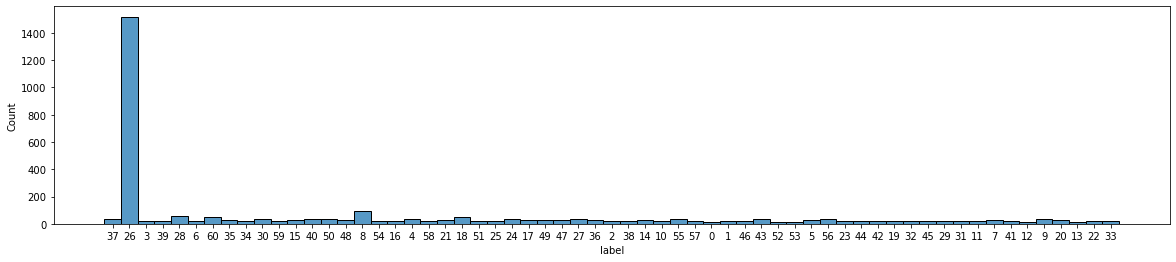

In [27]:
# 라벨 값이 상당히 불균형적임: smothe?
plt.figure(figsize=(20,4))
sns.histplot(y_train.label.astype(str))

In [12]:
X_test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [14]:
X_train_gp = X_train.groupby('id').agg(['max','min','mean','median'])[['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z']]
X_train_gp

acc_x                                   acc_y                      \
           max       min      mean    median       max       min      mean   
id                                                                           
0     1.344268  0.591940  0.931329  0.956149  0.176871 -0.624113 -0.218471   
1     1.234020 -2.156208 -0.766580 -0.805767  0.700065 -1.295598 -0.317258   
2     1.219836 -1.142847  0.039836  0.140667  0.650645 -0.690990 -0.082403   
3    -0.622250 -1.417751 -0.887702 -0.880343  0.283721 -0.540827 -0.087668   
4     0.599720 -2.429109 -0.659018 -0.941146  1.724782 -2.055076 -0.337067   
...        ...       ...       ...       ...       ...       ...       ...   
3120  0.390798 -1.624711 -0.300454 -0.105704  0.168070 -1.289257 -0.669209   
3121 -0.446650 -1.575455 -0.974298 -0.980053  0.117965 -0.609743 -0.233373   
3122  0.744666 -2.578974 -1.114246 -1.057063  1.268138 -2.036646 -0.362196   
3123  0.915846 -0.929133 -0.111333 -0.178023  1.473727  0.272406  0.880362   
3124  0.538809 -1.013813 -0.434048 -0.613512 -0.193247 -0.952761 -0.623010   

                   acc_z            ...       gy_x                   gy_y  \
        median       max       min  ...       mean     median         max   
id                                  ...                                     
0    -0.240638 -0.054876 -0.786336  ...  -1.865269  -1.273569   69.847244   
1    -0.228905  0.888661 -1.019531  ...  11.071600   3.810650  389.608060   
2    -0.062598  1.332992  0.073846  ...  -8.472951  -8.112557  297.320834   
3    -0.054577  0.598814 -0.257124  ...  17.744167   8.229938  159.083788   
4    -0.168467  2.678034 -1.250483  ...  -4.819638  -1.292194  284.952954   
...        ...       ...       ...  ...        ...        ...         ...   
3120 -0.737803  0.849966 -0.551185  ...  -5.382982  -2.108505  134.585268   
3121 -0.208131  0.218621 -0.403201  ...  11.394976   0.549861   53.341929   
3122 -0.306436  0.803950 -0.459267  ...  -3.821330 -10.212953  388.749570   
3123  0.902584  0.382916 -0.646863  ...  -6.223759  -5.240574  319.723456   
3124 -0.677878  0.543977 -0.380657  ...  -1.638705  -2.789478   90.173541   

                                              gy_z                        \
             min       mean     median         max         min      mean   
id                                                                         
0     -85.887677  -3.359506  -2.362230   55.953827  -79.930029  1.182107   
1    -315.096003   1.740475   8.043707  340.170199 -270.980823  1.393294   
2    -249.953944   0.597877  19.306132   55.642836  -44.192071  3.053291   
3     -82.537304   4.800931   1.783260   56.456908  -85.600536 -5.869898   
4    -243.909948   9.651713   0.977772  221.015193 -270.581913  4.453382   
...          ...        ...        ...         ...         ...       ...   
3120 -190.818371  -4.902798   1.894707  121.958427  -79.392292 -0.054026   
3121  -33.757220   3.786842   1.609188   57.349878  -39.777626 -2.792238   
3122 -380.819269  10.172169  35.748108  453.943910 -247.908573 -1.722830   
3123 -148.431769 -11.608354 -26.925407  310.558507 -206.580638 -5.930252   
3124 -134.268304  -1.226870   3.510459   80.302840 -100.845205 -3.246825   

                 
         median  
id               
0      1.913286  
1     -0.655819  
2      3.568888  
3     -3.853078  
4     -0.750283  
...         ...  
3120  -2.190464  
3121  -2.073951  
3122  -7.884967  
3123 -13.745464  
3124   1.583578  

[3125 rows x 24 columns]

In [113]:
X_test_gp = X_test.groupby('id').agg(['max','min','mean','median'])[['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z']]
X_test_gp

acc_x                                   acc_y                      \
           max       min      mean    median       max       min      mean   
id                                                                           
3125 -0.275446 -1.564000 -1.018731 -1.064222  0.228040 -0.470937 -0.019574   
3126  0.627571 -1.929033 -0.522843 -0.677411  1.708743 -0.200678  0.612161   
3127  2.972063 -0.792916  0.506947  0.497370  1.941820  0.219008  0.903819   
3128  0.337281 -1.045889 -0.577603 -0.880541 -0.258476 -1.294482 -0.610557   
3129  0.015642 -2.153047 -0.738640 -0.703842  1.562602 -0.860883  0.182535   
...        ...       ...       ...       ...       ...       ...       ...   
3902  0.427159 -2.050254 -0.907299 -0.973938  3.057501 -1.414874  0.488264   
3903  1.659451 -1.709527 -0.608731 -0.812788  1.549890 -1.247963  0.371269   
3904 -0.085249 -2.124959 -0.753193 -0.809029  1.236138 -0.443533  0.199782   
3905  1.438345  0.536568  0.958903  0.954265  0.076427 -0.580191 -0.320975   
3906  0.224194 -1.534616 -0.781752 -0.857164  0.144179 -0.958351 -0.369244   

                   acc_z            ...       gy_x                   gy_y  \
        median       max       min  ...       mean     median         max   
id                                  ...                                     
3125 -0.005735  0.286182 -0.573836  ...  -3.185128  -3.770150   96.185341   
3126  0.606215  0.671876 -1.212052  ... -17.741526 -14.305258  241.240196   
3127  0.931239  0.644154 -0.484614  ...  -2.179745   0.476247   74.530763   
3128 -0.507927  0.702574 -0.469924  ...   0.808579   1.457625  118.268797   
3129  0.122280  1.037876 -0.631258  ...  -1.431538  -3.066063  226.728939   
...        ...       ...       ...  ...        ...        ...         ...   
3902  0.445913  0.237183 -1.517656  ...   5.218293  11.891522  220.936927   
3903  0.333884  0.713875 -0.996954  ...   6.350148   4.420148  225.268834   
3904  0.097582  0.939270 -0.332901  ...  -0.761053   1.613377  129.420821   
3905 -0.321114  0.097833 -0.774209  ...   2.559009   1.455489  101.379591   
3906 -0.378006  1.033111 -0.539595  ... -11.480833 -12.009931  186.272547   

                                            gy_z                         \
             min      mean    median         max         min       mean   
id                                                                        
3125  -81.607713  2.731872  0.108956   49.981455  -35.446915  -2.000683   
3126  -97.100707  6.974772 -0.974696  169.417650 -147.597574  -3.604579   
3127  -98.420987 -2.251452 -2.319172   97.211730 -154.477074  -0.393175   
3128 -168.031080 -2.984969 -0.269600  167.860762 -117.297766  -0.024318   
3129 -223.475411  1.442366  1.631638  138.130133 -125.598600   5.745498   
...          ...       ...       ...         ...         ...        ...   
3902 -212.399091  1.218743 -4.761943  214.192019 -241.419881  -0.429678   
3903 -205.407503  3.987078  6.321390  253.689077 -164.337764  13.272141   
3904 -142.559610 -2.325664  0.312589  251.344358 -150.012379   1.935083   
3905  -83.950263 -1.653229 -8.024193   58.041427  -51.905231   0.932313   
3906 -112.020378 -3.664275 -4.371654  101.996940 -190.358982  -7.197783   

                 
         median  
id               
3125  -1.607847  
3126 -10.833508  
3127  -3.087735  
3128  -0.404583  
3129   1.866352  
...         ...  
3902   0.082838  
3903  12.650478  
3904   0.607579  
3905  -3.805979  
3906  -3.206301  

[782 rows x 24 columns]

### DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
dt_clf =DecisionTreeClassifier(random_state=1)

In [32]:
dt_clf.fit(X_train_gp, y_train)

DecisionTreeClassifier(random_state=1)

In [33]:
dt_clf.get_depth()

41

In [96]:
dt_clf =DecisionTreeClassifier(random_state=1)

In [98]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':list(range(1,20,2)),'min_samples_split':list(range(2,20,2))}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='neg_log_loss', cv=5, verbose=1)
grid_cv.fit(X_train_gp, y_train.label)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-0.2431529858202322
{'max_depth': 17, 'min_samples_split': 4}


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   19.6s finished


- 피쳐 중요도 파악

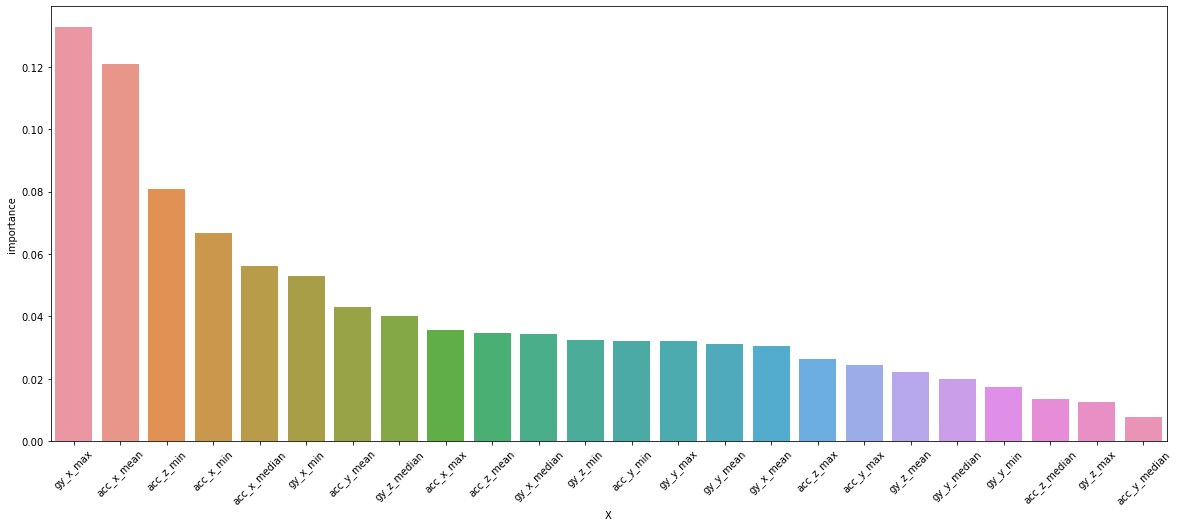

In [65]:
best_df_clf = grid_cv.best_estimator_

ftr_importances = pd.DataFrame(best_df_clf.feature_importances_,index=X_train_gp.columns).reset_index()
ftr_importances['X']=ftr_importances.level_0 +'_'+ftr_importances.level_1
ftr_importances.columns = ['','','importance','X']
ftr_importances.sort_values(by='importance',ascending=False, inplace=True)

plt.figure(figsize=(20,8))
sns.barplot(data=ftr_importances,x='X',y='importance')
plt.xticks(rotation=45)
plt.show()

### RandomForest

- smote 전 logloss: 1.4
- smote 후 logloss: 1.8

#### RandomForest

In [15]:
from sklearn.ensemble import RandomForestClassifier

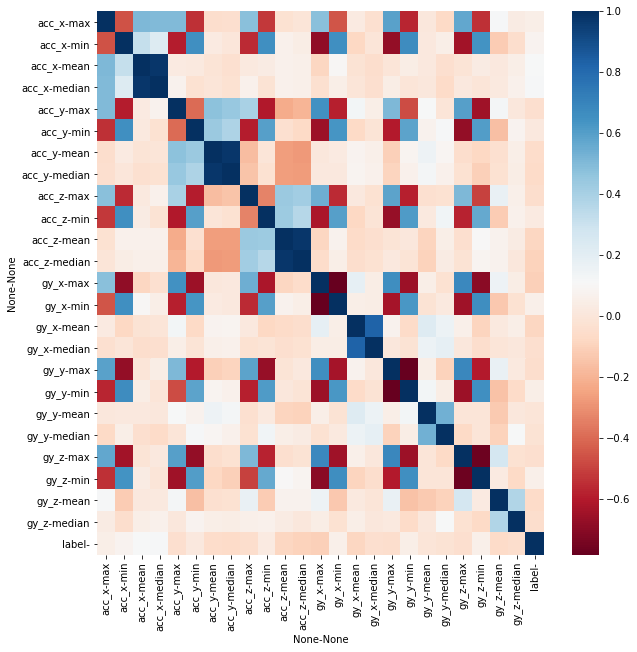

In [71]:
# 피처 상관도 파악 # 뚜렷한 결과 X
X_train_gp['label']=y_train.label
corr = X_train_gp.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='RdBu')
plt.show()

In [118]:
X_train_gp.drop('label',axis=1,inplace=True)

In [86]:
rt_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [121]:
params = {'max_depth':[8,10,12,14,16], 'min_samples_leaf':[8,12,16,18],'min_samples_split':[8,12,16]}

grid_cv = GridSearchCV(rt_clf, param_grid=params, scoring='neg_log_loss', cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train_gp, y_train.label)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.2s finished


-1.4564465513242155
{'max_depth': 14, 'min_samples_leaf': 8, 'min_samples_split': 12}


In [136]:
rt_clf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=300,max_depth=14,min_samples_leaf=8,min_samples_split=12)
rt_clf.fit(X_train_gp, y_train.label)
proba = rt_clf.predict_proba(X_test_gp)

In [137]:
ans = sample.copy()
ans.iloc[:,1:]=proba

In [139]:
ans.to_csv('answer_rf.csv',index=False)

#### smote 적용

In [142]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [189]:
def smoth_CV(feature, label, model, cv):
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import log_loss
    import numpy
    smote = SMOTE(random_state=0)
    kfold = StratifiedKFold(n_splits=cv)
    
    score = []
    
    for train_i, test_i in kfold.split(feature, label.label):
        # 학습 및 검증 데이터 생성
        X_train = feature.iloc[train_i,:]
        y_train = label.label[train_i]
        X_test = feature.iloc[test_i,:]
        y_test = label.label[test_i]
        
        # 학습 데이터 오버 샘플링
        X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
        
        # 모델 학습, 예측, 평가
        model.fit(X_train_over, y_train_over)
        proba = model.predict_proba(X_test)
        score.append(log_loss(y_test,proba))
    
    print(np.mean(score))
    return model

In [190]:
rt_clf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=300,max_depth=14,min_samples_leaf=8,min_samples_split=12)

rt_smoth = smoth_CV(X_train_gp, y_train, rt_clf, 5)

1.8864431818561394


In [191]:
rt_smoth.predict_proba(X_test_gp)

RandomForestClassifier(max_depth=14, min_samples_leaf=8, min_samples_split=12,
                       n_estimators=300, n_jobs=-1, random_state=0)

In [193]:
ans = sample.copy()
ans.iloc[:,1:]=rt_smoth.predict_proba(X_test_gp)

In [196]:
ans.to_csv('ans_rf_smote.csv')

### XgBoost
- before smote logloss: 1.16
- after smote logloss: 1.32

In [198]:
def gridCV(model, params, cv, x, y):
    from sklearn.model_selection import GridSearchCV
    
    grid_cv = GridSearchCV(model, param_grid=params, scoring='neg_log_loss', cv=cv, verbose=1, n_jobs=-1)
    grid_cv.fit(x, y.label)
    
    print('best score: ',grid_cv.best_score_)
    print('best params: ',grid_cv.best_params_)
    
    return grid_cv.best_estimator_

In [231]:
from sklearn.model_selection import train_test_split
ftr_train, ftr_test, lb_train, lb_test = train_test_split(X_train_gp, y_train.label, test_size=0.2, random_state=0, stratify=y_train.label)

In [219]:
from xgboost import XGBClassifier

In [232]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=5)
evals = [(ftr_test, lb_test)]
xgb.fit(ftr_train, lb_train, early_stopping_rounds=100, eval_metric='mlogloss',eval_set=evals, verbose=True)

[0]	validation_0-mlogloss:2.99612


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-mlogloss:2.74760
[2]	validation_0-mlogloss:2.55969
[3]	validation_0-mlogloss:2.40582
[4]	validation_0-mlogloss:2.27432
[5]	validation_0-mlogloss:2.17040
[6]	validation_0-mlogloss:2.07724
[7]	validation_0-mlogloss:1.99319
[8]	validation_0-mlogloss:1.92086
[9]	validation_0-mlogloss:1.85809
[10]	validation_0-mlogloss:1.79916
[11]	validation_0-mlogloss:1.74526
[12]	validation_0-mlogloss:1.69802
[13]	validation_0-mlogloss:1.65295
[14]	validation_0-mlogloss:1.61685
[15]	validation_0-mlogloss:1.58153
[16]	validation_0-mlogloss:1.55109
[17]	validation_0-mlogloss:1.51998
[18]	validation_0-mlogloss:1.49240
[19]	validation_0-mlogloss:1.46526
[20]	validation_0-mlogloss:1.44246
[21]	validation_0-mlogloss:1.42086
[22]	validation_0-mlogloss:1.40120
[23]	validation_0-mlogloss:1.38346
[24]	validation_0-mlogloss:1.36602
[25]	validation_0-mlogloss:1.35015
[26]	validation_0-mlogloss:1.33644
[27]	validation_0-mlogloss:1.32166
[28]	validation_0-mlogloss:1.30779
[29]	validation_0-mlogloss:1.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [235]:
smote = SMOTE(random_state=0)

ftr_train, lb_train = smote.fit_sample(ftr_train, lb_train)

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=5, n_jobs=-1)

evals = [(ftr_test, lb_test)]
xgb.fit(ftr_train, lb_train, early_stopping_rounds=100, eval_metric='mlogloss',eval_set=evals, verbose=True)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:3.47122
[1]	validation_0-mlogloss:3.30721
[2]	validation_0-mlogloss:3.16128
[3]	validation_0-mlogloss:3.03766
[4]	validation_0-mlogloss:2.93601
[5]	validation_0-mlogloss:2.84464
[6]	validation_0-mlogloss:2.76541
[7]	validation_0-mlogloss:2.68606
[8]	validation_0-mlogloss:2.61640
[9]	validation_0-mlogloss:2.55228
[10]	validation_0-mlogloss:2.49231
[11]	validation_0-mlogloss:2.43809
[12]	validation_0-mlogloss:2.38896
[13]	validation_0-mlogloss:2.34359
[14]	validation_0-mlogloss:2.30295
[15]	validation_0-mlogloss:2.26211
[16]	validation_0-mlogloss:2.22377
[17]	validation_0-mlogloss:2.18667
[18]	validation_0-mlogloss:2.15262
[19]	validation_0-mlogloss:2.11597
[20]	validation_0-mlogloss:2.08718
[21]	validation_0-mlogloss:2.05861
[22]	validation_0-mlogloss:2.02668
[23]	validation_0-mlogloss:1.99793
[24]	validation_0-mlogloss:1.96995
[25]	validation_0-mlogloss:1.94544
[26]	validation_0-mlogloss:1.92391
[27]	validation_0-mlogloss:1.89856
[28]	validation_0-mlogloss:1.8

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### LightGBM

In [236]:
from lightgbm import LGBMClassifier

In [ ]:
def gridCV(model, params, cv, x, y):
    from sklearn.model_selection import GridSearchCV
    
    grid_cv = GridSearchCV(model, param_grid=params, scoring='neg_log_loss', cv=cv, verbose=1, n_jobs=-1)
    grid_cv.fit(x, y.label)
    
    print('best score: ',grid_cv.best_score_)
    print('best params: ',grid_cv.best_params_)
    
    return grid_cv.best_estimator_

In [239]:
y_train

570     25
660     39
709     36
731     12
737     36
        ..
3120    26
3121    26
3122    15
3123    26
3124     2
Name: label, Length: 2083, dtype: int64

In [242]:
ftr_train, ftr_test, lb_train, lb_test = train_test_split(X_train_gp, y_train.label, test_size=0.2, random_state=0, stratify=y_train.label)

In [249]:
lgbm_clf = LGBMClassifier(n_estimator=200, n_jobs=-1, boost_from_average = False)
params = {'num_leaves':[32,64],'max_depth':[128,160],'min_child_samples':[60,100]}
grid_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
evals = [(ftr_test, lb_test)]
grid_cv.fit(ftr_train, lb_train, early_stopping_rounds=30, eval_metric='mlogloss', eval_set=eval,verbose=True)


C:\Users\shin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shin\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 840, in fit
    valid_sets = [None] * len(eval_set)
TypeError: object of type 'builtin_function_or_method' has no len()

  warnings.warn("Estimator fit failed. The score on this train-test"


TypeError: object of type 'builtin_function_or_method' has no len()